In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [2]:
with open("../../datasets/df_all_comments_parsed_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
len(df_all)

921971

In [4]:
df_all_ns0 = df_all.query("page_namespace == 0")

In [5]:
counts_bottype_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_dict[lang]=pd.concat([type_counts, type_percent], axis=1)
    
counts_bottype_group_dict = {}

for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype_group'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype_group'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_group_dict[lang]=pd.concat([type_counts, type_percent], axis=1)

In [6]:
counts_bottype_group_dict['en']

,count,percent
fixing double redirect,110086,45.04%
interwiki link cleanup -- method1,83761,34.27%
interwiki link cleanup -- method2,37102,15.18%
botfight,3429,1.4%
protection template cleanup,2837,1.16%
not classified,2619,1.07%
category work,1726,0.71%
template work,1272,0.52%
other w/ revert in comment,1007,0.41%
other classified,560,0.23%


In [7]:
gb_lang_bottype = df_all_ns0.groupby(["language", "bottype"])['revisions_reverted']
gb_lang_bottype_group = df_all_ns0.groupby(["language", "bottype_group"])['revisions_reverted']

In [8]:
gb_lang_bottype.count().unstack().transpose().replace(np.nan,0)

language,de,en,es,fr,ja,pt,zh
bottype,,,,,,,
botfight: 718bot vs ImageRemovalBot,1.0,170.0,0.0,0.0,0.0,0.0,0.0
botfight: Cyberbot II vs AnomieBOT date tagging,0.0,301.0,0.0,0.0,0.0,0.0,0.0
botfight: Russbot vs Cydebot category renaming,9.0,2116.0,0.0,0.0,0.0,0.0,0.0
botfight: infoboxneeded,0.0,98.0,0.0,0.0,0.0,0.0,0.0
botfight: mathbot mathlist updates,0.0,514.0,0.0,0.0,0.0,0.0,0.0
botfight: reverting CommonsDelinker,5.0,230.0,16.0,2.0,0.0,1.0,3.0
category redirect cleanup,0.0,339.0,106.0,0.0,0.0,0.0,0.0
clearing sandbox,0.0,1.0,1.0,2.0,0.0,1.0,0.0
commons image migration,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [9]:
gb_lang_bottype_group.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,986.0,110086.0,9319.0,3296.0,294.0,1908.0,3634.0
interwiki link cleanup -- method1,16565.0,83761.0,16146.0,10093.0,5044.0,13629.0,14672.0
interwiki link cleanup -- method2,35883.0,37102.0,37826.0,41165.0,27631.0,41588.0,23649.0
botfight,15.0,3429.0,16.0,2.0,0.0,1.0,3.0
protection template cleanup,6.0,2837.0,0.0,0.0,0.0,0.0,0.0
not classified,1410.0,2619.0,3193.0,1027.0,1617.0,2846.0,794.0
category work,6.0,1726.0,106.0,269.0,0.0,0.0,0.0
template work,5.0,1272.0,134.0,0.0,0.0,0.0,0.0
other w/ revert in comment,21.0,1007.0,1099.0,3.0,11.0,26.0,257.0


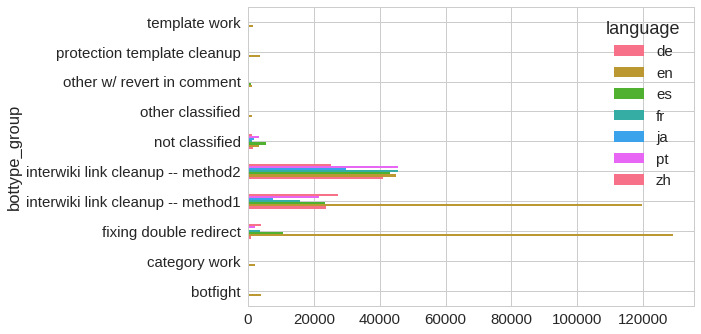

In [10]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='barh')

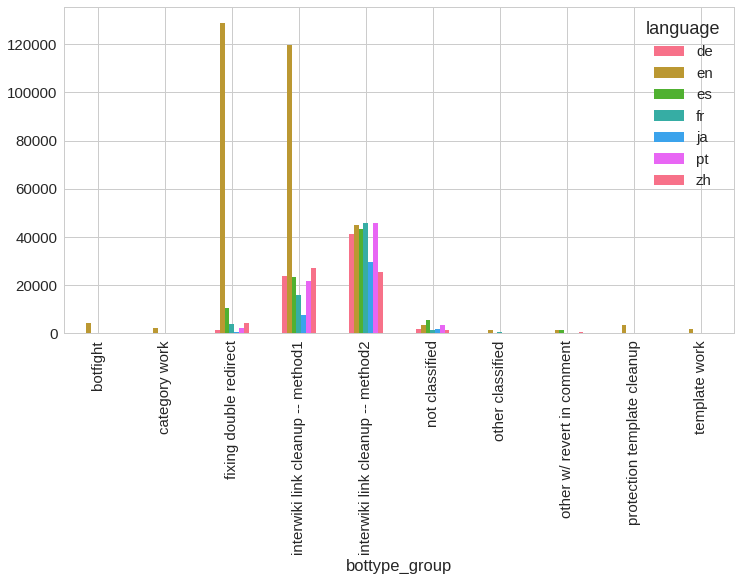

In [11]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='bar', subplots=False, figsize=[12,6])

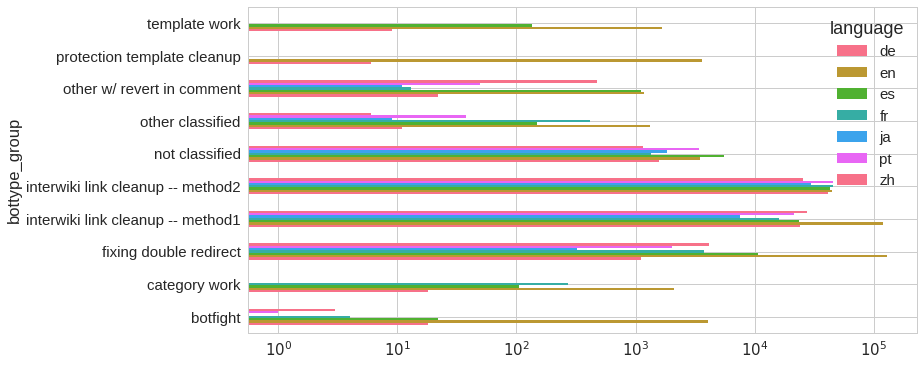

In [12]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='barh', subplots=False, figsize=[12,6])

plt.xscale("log")

## Classified time to revert

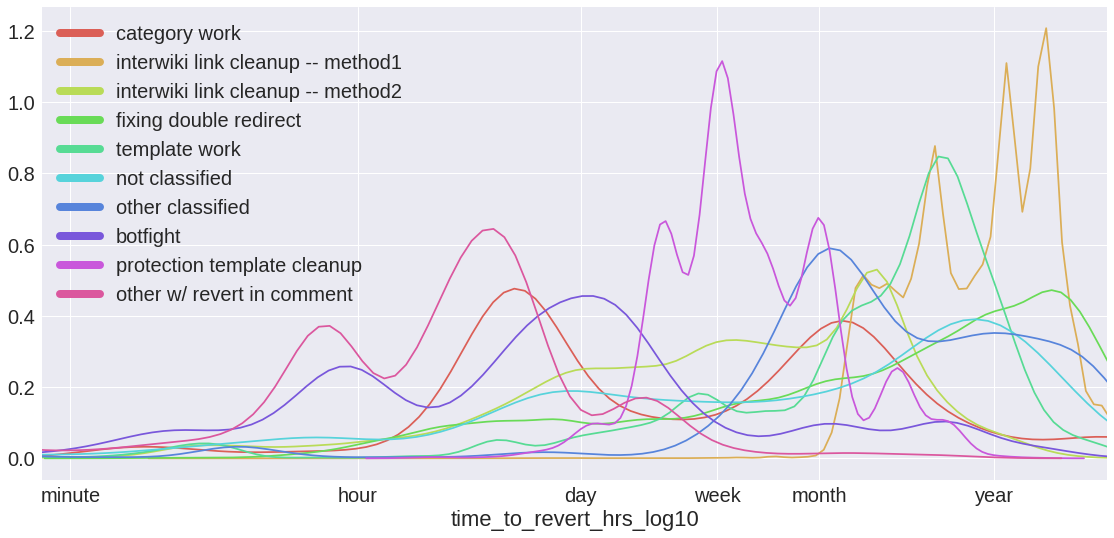

In [13]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

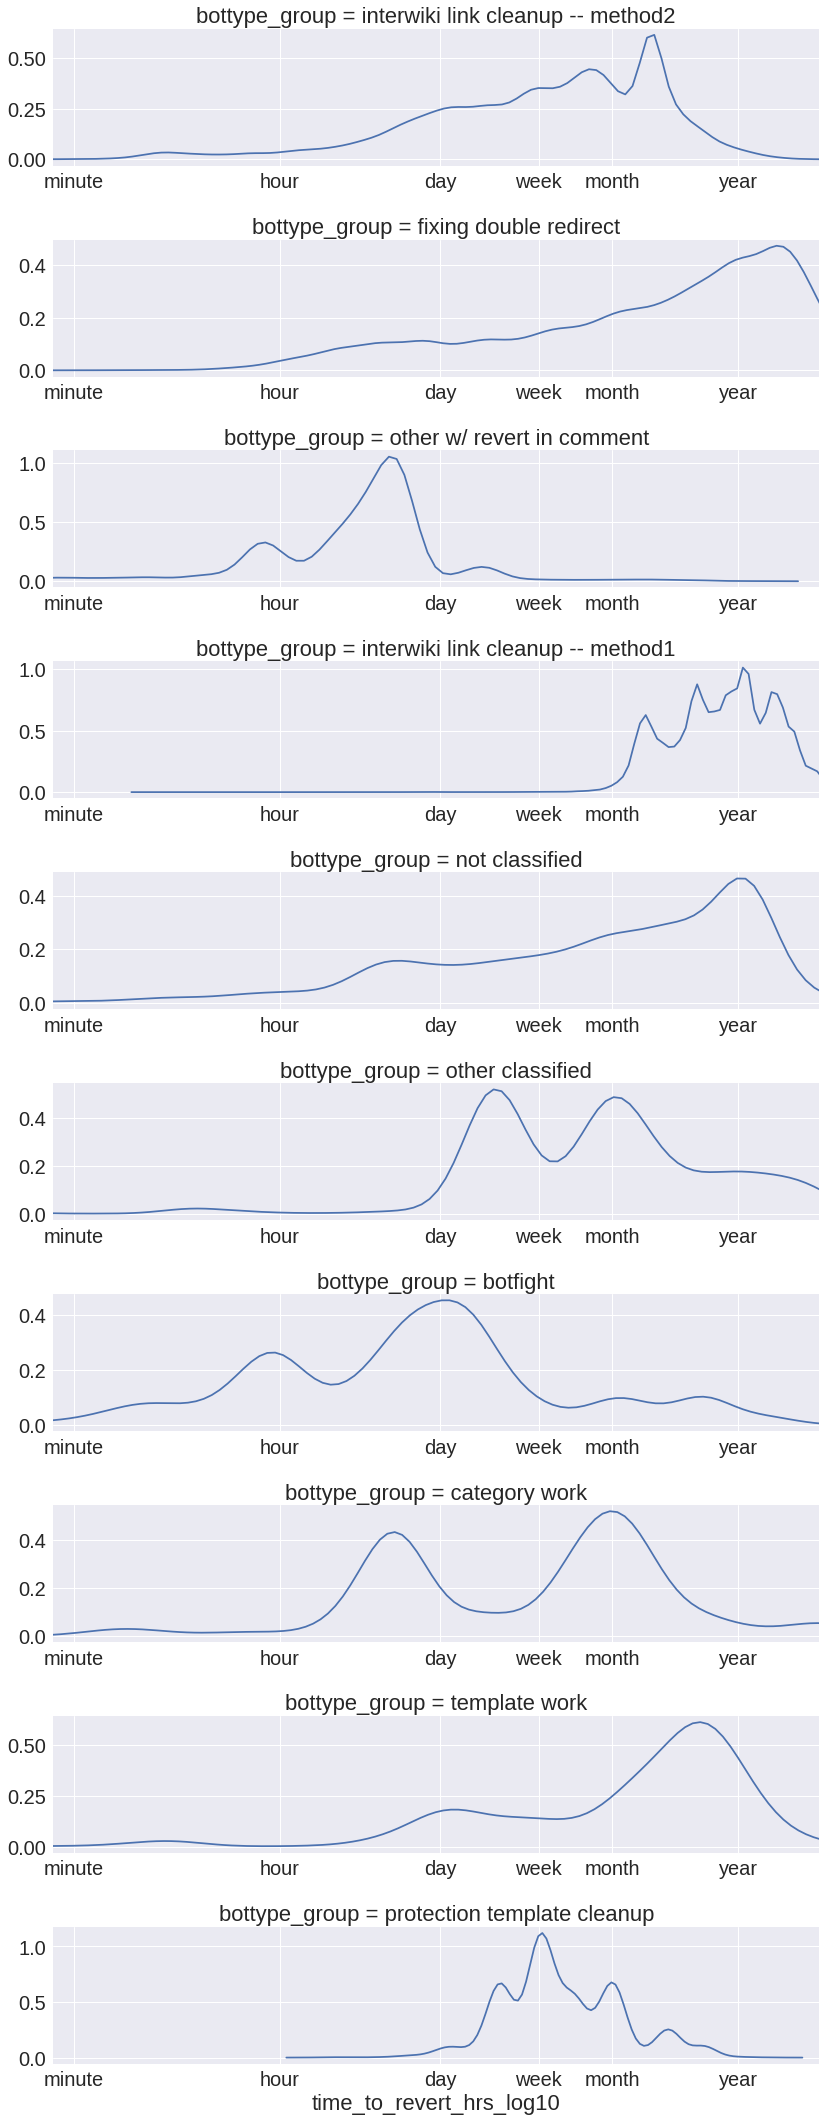

In [14]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="bottype_group", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

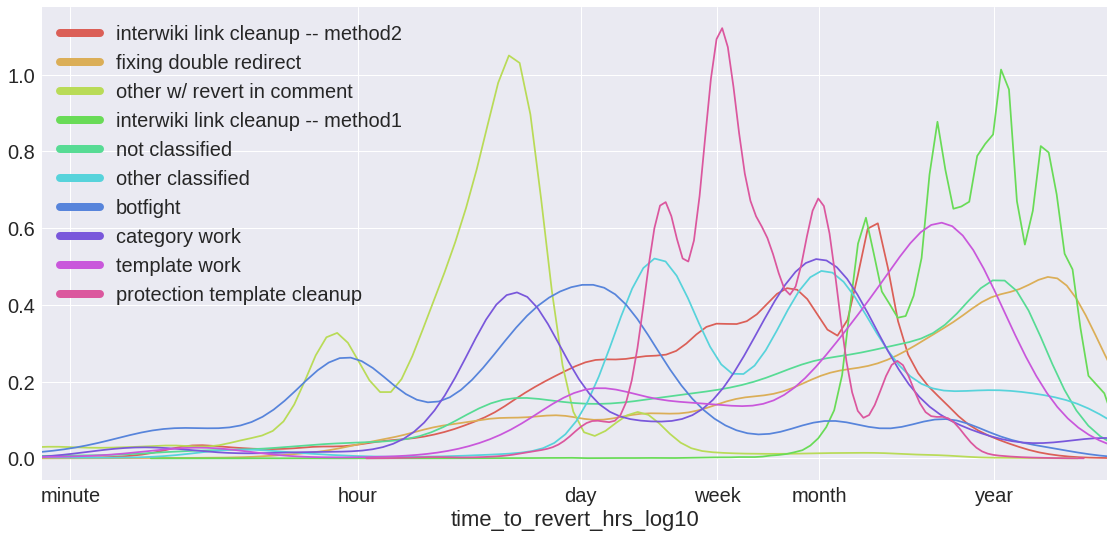

In [15]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

In [16]:
gb_group_per_page = df_all.query("page_namespace == 0").groupby(["language","bottype_group"])['reverts_per_page_botpair_sorted']

In [17]:
gb_group_per_page.mean().unstack()

bottype_group,botfight,category work,fixing double redirect,interwiki link cleanup -- method1,interwiki link cleanup -- method2,not classified,other classified,other w/ revert in comment,protection template cleanup,template work
language,,,,,,,,,,
de,1.800000,3.000000,1.160243,1.000423,1.171140,1.124113,1.200000,1.047619,1.00000,1.00000
en,6.218723,1.207416,1.122032,1.000048,1.106302,2.681940,4.096429,2.811321,1.11632,1.02673
es,1.000000,1.000000,1.136388,1.000867,1.115450,1.091763,1.000000,1.015469,NaN,1.00000
fr,1.000000,1.000000,1.033374,1.001486,1.119398,1.094450,1.002500,1.666667,NaN,NaN
ja,NaN,NaN,1.071429,1.002974,1.192646,1.015461,1.000000,1.363636,NaN,NaN
pt,1.000000,NaN,1.068658,1.000660,1.135087,1.039705,1.000000,1.192308,NaN,NaN
zh,1.000000,NaN,1.157953,1.000136,1.205759,1.148615,1.333333,1.513619,NaN,NaN


In [18]:
df_all_ns0_multiple_reverts = df_all_ns0.query("reverts_per_page_botpair > 1")
gb_lang_bottype_group_rr = df_all_ns0_multiple_reverts.groupby(["language", "bottype_group"])['revisions_reverted']

In [19]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,0.0,2128.0,214.0,16.0,0.0,4.0,58.0
botfight,2.0,802.0,0.0,0.0,0.0,0.0,0.0
interwiki link cleanup -- method2,796.0,634.0,687.0,681.0,740.0,734.0,752.0
protection template cleanup,0.0,282.0,0.0,0.0,0.0,0.0,0.0
not classified,38.0,173.0,69.0,26.0,13.0,49.0,31.0
other w/ revert in comment,0.0,91.0,7.0,2.0,2.0,2.0,117.0
other classified,0.0,69.0,0.0,1.0,0.0,0.0,0.0
category work,4.0,18.0,0.0,0.0,0.0,0.0,0.0
interwiki link cleanup -- method1,3.0,0.0,2.0,6.0,2.0,2.0,1.0


In [20]:
df_all_ns0_multiple_reverts = df_all_ns0.query("reverts_per_page_botpair_sorted > 1 and time_to_revert_days < 180")
gb_lang_bottype_group_rr = df_all_ns0_multiple_reverts.groupby(["language", "bottype_group"])['revisions_reverted']

In [21]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,108.0,8829.0,687.0,86.0,20.0,113.0,443.0
interwiki link cleanup -- method2,2909.0,2171.0,2284.0,2567.0,2059.0,2320.0,2169.0
botfight,10.0,1744.0,0.0,0.0,0.0,0.0,0.0
not classified,86.0,358.0,155.0,59.0,20.0,60.0,67.0
category work,4.0,350.0,0.0,0.0,0.0,0.0,0.0
protection template cleanup,0.0,258.0,0.0,0.0,0.0,0.0,0.0
other w/ revert in comment,1.0,170.0,12.0,2.0,4.0,5.0,121.0
other classified,1.0,97.0,0.0,1.0,0.0,0.0,2.0
template work,0.0,34.0,0.0,0.0,0.0,0.0,0.0


In [22]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False).sum()

language
de     3121.0
en    14015.0
es     3142.0
fr     2721.0
ja     2107.0
pt     2501.0
zh     2804.0
dtype: float64

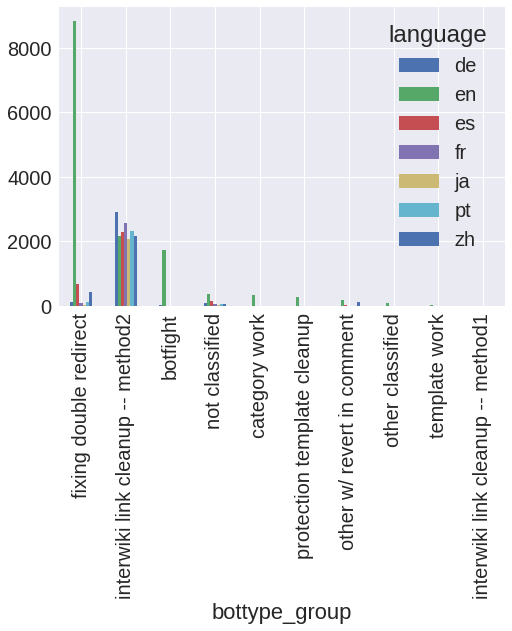

In [23]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False).plot(kind='bar')

In [24]:
len(df_all.query("language=='en' and page_namespace==0 and reverts_per_page_botpair == 2"))

2794